In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

In [4]:
df=pd.read_csv("kc_house_data.csv")
df.drop(["id","date","zipcode"],inplace=True,axis=1)

In [6]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


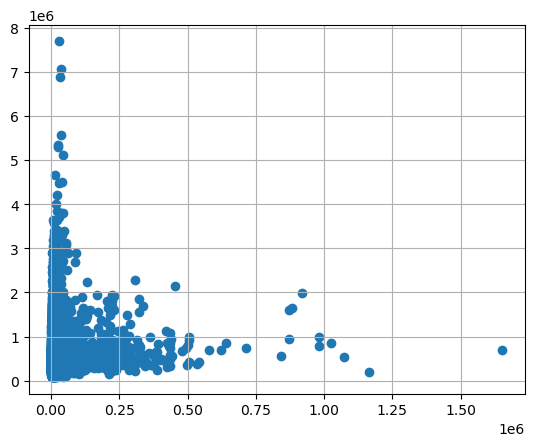

In [11]:
plt.scatter(df["sqft_lot"],df["price"])
plt.grid()

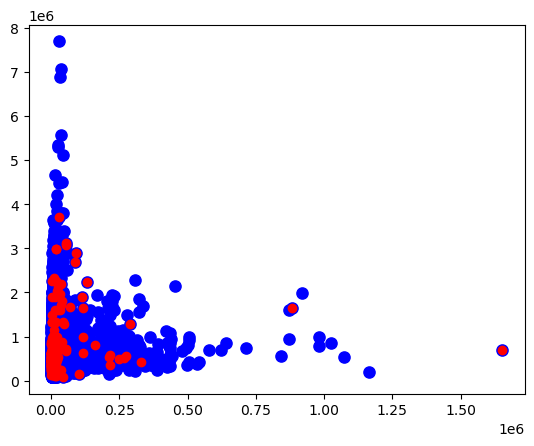

In [13]:
model1=LocalOutlierFactor(n_neighbors=2,metric="manhattan",contamination=0.02)
y_pred=model1.fit_predict(df)
outlier_index=(y_pred==-1)
outlier_values=df.iloc[outlier_index]
plt.scatter(df["sqft_lot"],df["price"],color="b",s=65)
plt.scatter(outlier_values["sqft_lot"],outlier_values["price"],color="r")

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA

In [20]:
data=pd.read_csv("kc_house_data.csv")
data.drop(["id","date","zipcode"],inplace=True,axis=1)

In [21]:
X=data.iloc[:, :-1]
y=data.iloc[:, -1]

In [23]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [24]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [25]:
y_pred = clf.fit_predict(X_pca)
n_errors = (y_pred != y).sum()
X_scores = clf.negative_outlier_factor_

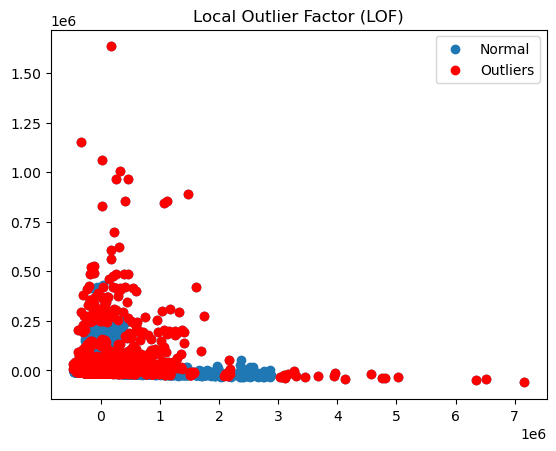

In [31]:
lofs_index = np.where(y_pred!=1)
values = X_pca[lofs_index]
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X_pca[:,0], X_pca[:,1], label="Normal")
plt.scatter(values[:,0],values[:,1], color='r', label="Outliers")
plt.legend(loc="upper right")
plt.show()

In [39]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Load the dataset
data = pd.read_csv("kc_house_data.csv")
data.drop(["id","date","zipcode"],inplace=True,axis=1)

# Prepare the feature matrix
X = data.drop(["price"], axis=1).values

# Define the LocalOutlierFactor model
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Fit the model to the data
y_pred = clf.fit_predict(X)

# Find the indices of the data points considered as outliers
outlier_indices = (y_pred == -1)

# Get the outlier data
outlier_data = data[outlier_indices]
outlier_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
25,233000.0,3,2.00,1710,4697,1.5,0,0,5,6,1710,0,1941,0,47.3048,-122.218,1030,4705
55,885000.0,4,2.50,2830,5000,2.0,0,0,3,9,2830,0,1995,0,47.6597,-122.290,1950,5000
72,571000.0,4,2.00,2750,7807,1.5,0,0,5,7,2250,500,1916,0,47.7168,-122.287,1510,7807
75,832500.0,4,4.00,3430,35102,2.0,0,0,4,10,2390,1040,1986,0,47.5822,-121.987,3240,35020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21573,785000.0,4,3.50,3070,4684,2.0,0,0,3,10,2190,880,2009,0,47.5316,-122.076,2290,2664
21576,3567000.0,5,4.50,4850,10584,2.0,1,4,3,10,3540,1310,2007,0,47.5943,-122.110,3470,18270
21578,362500.0,2,1.50,940,1768,2.0,0,0,3,7,940,0,2009,0,47.5925,-122.295,1130,1159
21591,572000.0,4,2.75,2770,3852,2.0,0,0,3,8,2770,0,2014,0,47.5001,-122.232,1810,5641
